   # ----------------------------Course Project---------------------------- 
   ##### **Name** : *Muhammet Ali*
   ##### **Surname** : *Şentürk*
   ##### **Student ID** : *21993073*
   ##### **Lecture** : *AIN212*
   ##### **Due Date** : *16.01.2022*

In this project, I have been working on a data set about FIFA. 
* FIFA is the most popular football game in the world. 
* Every year, the developer company Electronic Arts(EA) releases the current version of this game by naming the game with the year the season will end(For example FIFA15 takes the topic of 2014/15 football season). 
* Our data set is FIFA20 which released in 2019 and it contains 18.547 players with their names, ages, nationalities etc. We will mostly not care about such variables. Because these variables are **mostly** categorical and they have a lot of unique values. 
* Aim of this project is to predict the overall rating of the players by looking at their passing, shooting, dribbling etc. So we will deal with **mostly** numerical variables. 
* Therefore I will use regression models.

### ----------------------------Physical and Contract Status of The Player----------------------------<br>
**Name:** Name of player<br>
**Image:** Image URL of player's face<br>
**Country:** Country the player belongs to<br>
**Position:** All positions the player plays<br>
**Age:** Age of the player<br>
**Overall:** Overall ability of the player<br>
**Potential:** Potential that a player could reach<br>
**Club:** Club which the player belongs to<br>
**ID:** Unique ID provided by sofifa(FIFA player database) for each player<br>
**Height:** Height in ft'inch" format<br>
**Weight:** Weight in lbs<br>
**foot:** Preferred Foot (Left/Right)<br>
**BOV:** Best Overall (Maximum Overall of a player in any position)<br>
**BP:** Best Position (The position where the player's overall is maximum)<br>
**Growth:** Ability to grow (Potential - Overall)<br>
**Joined:** Date when the player joined the club<br>
**Loan Date End:** When the loan end (if on loan)<br>
**Value:** Market value of a player<br>
**Wage:** Player's salary per game<br>
**Release Clause:** The price which releases the player as free status<br>

### ---------------------------Qualifications of The Player---------------------------<br>
'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',<br>
'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',<br>
'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',<br>
'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',<br>
'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',<br>
'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',<br>
'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',<br>
'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',<br>
'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',<br>
'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',<br>
'DRI', 'DEF', 'PHY', 'Hits'<br>

### ---------------------------Possible Player Positions---------------------------<br>
**GK:** Goalkeeper<br>
**RWB:** Right Wing Back<br>
**RB:** Right Back<br>
**CB:** Center Back<br>
**LB:** Left Back<br>
**LWB:** Left Wing Back<br>
**CDM:** Central Defensive Midfielder<br>
**RM:** Right Midfielder<br>
**CM:** Central Midfielder<br>
**LM:** Left Midfielder<br>
**CAM:** Central Attacking Midfielder<br>
**RW:** Right Wing<br>
**CF:** Center Forward<br>
**LW:** Left Wing<br>
**ST:** Striker

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Collection

In [2]:
# Read and print the shape of the data and first 5 rows of it.
drive_link = "https://drive.google.com/file/d/1OSG6Zwix_u12v-yMueT2Ip8lC9x_7z5M/view?usp=sharing"
dataset_link = "https://drive.google.com/uc?id=" + drive_link.split("/")[-2]
fifa20_df_org = pd.read_csv(dataset_link)
fifa20_df = fifa20_df_org.copy()
print("Shape of the data is: {}".format(fifa20_df.shape))
fifa20_df.head()

Shape of the data is: (18547, 75)


,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,https://cdn.sofifa.org/players/4/20/158023.png,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,158023,"5'7""",...,Medium,Low,5,87,92,92,96,39,66,585
1,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.org/players/4/20/20801.png,Portugal,"ST,LW",34,93,93,Juventus,20801,"6'2""",...,High,Low,5,90,93,82,89,35,78,448
2,Neymar da Silva Santos Jr.,https://cdn.sofifa.org/players/4/20/190871.png,Brazil,"LW,CAM",27,92,92,Paris Saint-Germain,190871,"5'9""",...,High,Medium,5,91,85,87,95,32,58,432
3,Jan Oblak,https://cdn.sofifa.org/players/4/20/200389.png,Slovenia,GK,26,91,91,Atlético Madrid,200389,"6'2""",...,Medium,Medium,3,87,92,78,89,52,90,240
4,Kevin De Bruyne,https://cdn.sofifa.org/players/4/20/192985.png,Belgium,"CAM,CM",28,91,91,Manchester City,192985,"5'11""",...,High,High,4,76,86,92,86,61,78,298


In [3]:
# Since we need to deal with numerical variables, we have to drop redundant columns
fifa20_df.columns

Index(['Name', 'Image', 'Country', 'Position', 'Age', 'Overall', 'Potential',
       'Club', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP', 'Growth',
       'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [4]:
# Drop redundant columns
fifa20_df.drop(['Name', 'Image', 'Country', 'Position', 'Age', 'Potential',
                 'Club', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'Growth',
                 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 
                 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 
                 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'], axis=1, inplace=True)

In [5]:
fifa20_df.rename(columns={'BP': "Best Position"}, inplace=True) # Rename the best posiiton column

# Step 2: Data Preprocessing and Cleaning
# Step 3: Data Exploration and Analysis
## (These two steps has been processed together)

In [6]:
fifa20_df.head() # Last shape of the data

,Overall,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,94,CAM,433,88,95,70,92,88,472,97,...,96,33,37,26,54,6,11,15,14,8
1,93,ST,437,84,94,89,83,87,415,89,...,84,28,32,24,58,7,11,15,14,11
2,92,CAM,410,87,87,62,87,87,447,96,...,82,27,26,29,59,9,9,15,15,11
3,91,GK,95,13,11,15,43,13,109,12,...,57,27,12,18,436,87,92,78,90,89
4,91,CAM,404,93,82,55,92,82,436,86,...,177,68,58,51,56,15,13,5,10,13


In [7]:
fifa20_df.columns

Index(['Overall', 'Best Position', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [8]:
fifa20_df.isnull().sum() # Looking for the missing values but there is not

Overall             0
Best Position       0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
dtype: int64

In [9]:
fifa20_df.dtypes
# We have only one categorical variable which is the position of the player
# Later on we will do one hot encoding process
# First let's visualize our data and try to understand it better

Overall              int64
Best Position       object
Attacking            int64
Crossing             int64
Finishing            int64
Heading Accuracy     int64
Short Passing        int64
Volleys              int64
Skill                int64
Dribbling            int64
Curve                int64
FK Accuracy          int64
Long Passing         int64
Ball Control         int64
Movement             int64
Acceleration         int64
Sprint Speed         int64
Agility              int64
Reactions            int64
Balance              int64
Power                int64
Shot Power           int64
Jumping              int64
Stamina              int64
Strength             int64
Long Shots           int64
Mentality            int64
Aggression           int64
Interceptions        int64
Positioning          int64
Vision               int64
Penalties            int64
Composure            int64
Defending            int64
Marking              int64
Standing Tackle      int64
Sliding Tackle       int64
G

Text(0, 0.5, 'Number of Players')

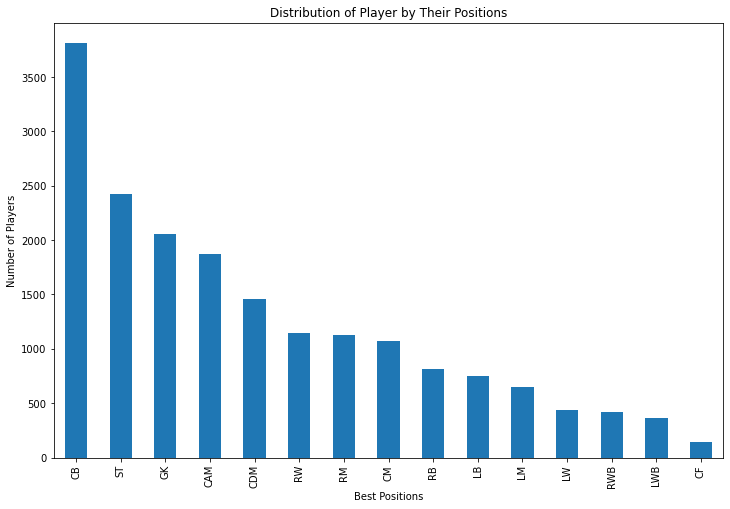

In [10]:
# This plot shows the distributions of the players grouping by their positions
fifa20_df['Best Position'].value_counts().plot(kind='bar', figsize=(12,8))
plt.title("Distribution of Player by Their Positions")
plt.xlabel("Best Positions")
plt.ylabel("Number of Players")

- It seems like there are so many center backs(CB) compared with the others.
- The closest position is striker(ST) which has around 1500 less players than center backs

Text(0, 0.5, 'Long Shots')

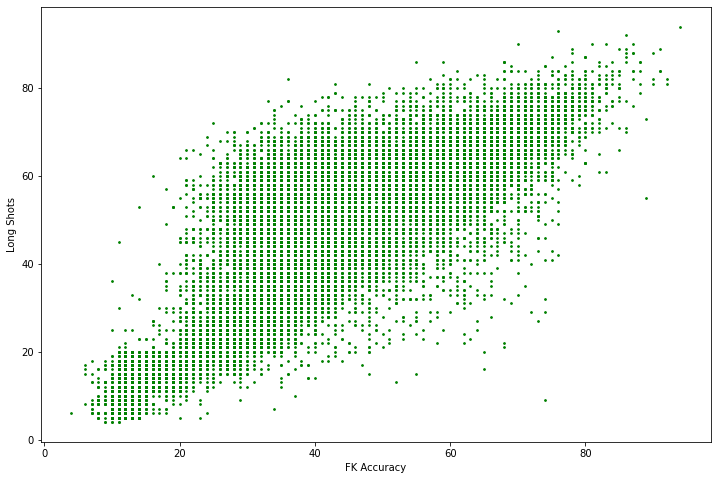

In [11]:
# This plot shows the relation between freekick accuracy and long shot qualifications
plt.figure(figsize=(12,8))
plt.scatter(x=fifa20_df["FK Accuracy"], y=fifa20_df["Long Shots"], c="green", s=3)
plt.xlabel("FK Accuracy")
plt.ylabel("Long Shots")

- This graph shows us there is a strong relationship between these two qualifications

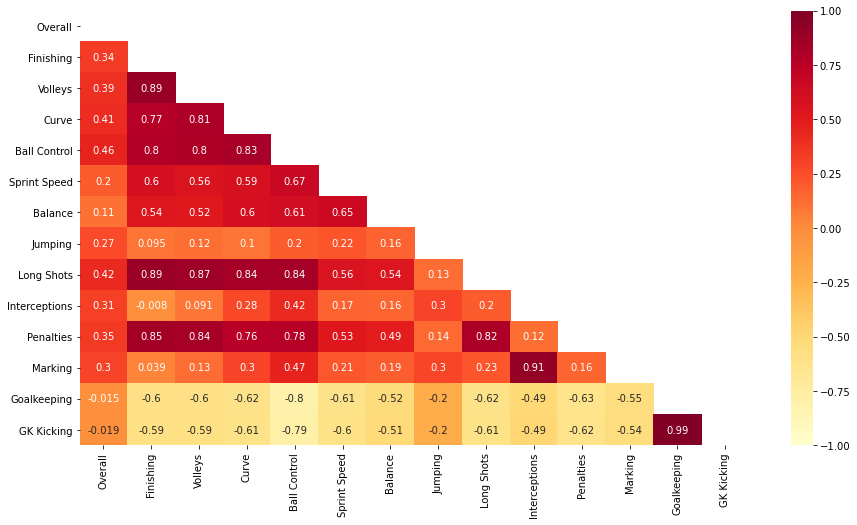

In [12]:
# This table is a correlation table that shows the correlation values between the randomly chose qualifications
corr = fifa20_df.corr().iloc[::3,::3]
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlOrRd')

* Value closest to 1 = positive correlation
* Value equals 0 = no correlation
* Value closest to -1 = negative corelation


#### Positively strong correlations:
* Goalkeeping-Goalkeeper Kicking
* Interceptions-Marking
* Long Shots-Finishing-Volleys

#### Positively weak correlations:
* Jumping-Balance
* Overall-Sprint Speed
* Penalties-Interceptions

#### Negatively strong correlations:
* Ball Control-Goalkeeping
* Ball Control-Goalkeeper Kicking

#### Negatively weak correlations:
* Interceptions-Finishing
* Goalkeeping-Overall

<AxesSubplot:xlabel='Best Position', ylabel='Overall'>

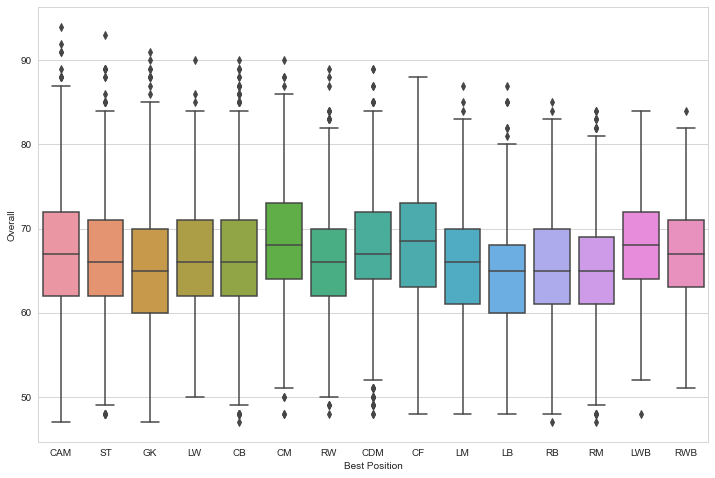

In [13]:
# So let's have a look for an outlier of overall variable for every player position
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.boxplot(x = 'Best Position', y = 'Overall', data = fifa20_df)

Goalkeeper and center back has so many outliers unlikely center forward and wing backs has almost not

<AxesSubplot:xlabel='Overall'>

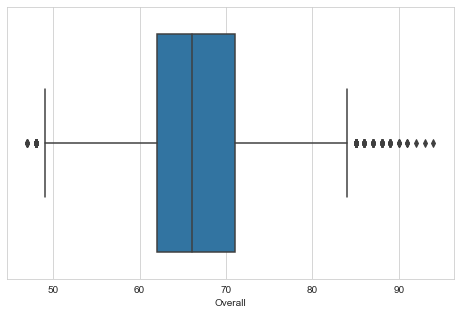

In [14]:
# This plot shows us the boxplot of overall attribute
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x = "Overall", data = fifa20_df)

As we can see there are some outliers and we have to deal with them

In [15]:
# This function takes the variable name argument
# Then it equalizes the outliers to first and third quartile(baskılama yöntemi)
def outlier_suppression(variable):
    df_variable = fifa20_df[variable]
    Q1 = df_variable.quantile(0.25)
    Q3 = df_variable.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outlier_lower = (df_variable < lower_limit)
    outlier_upper = (df_variable > upper_limit)
    df_variable[outlier_lower] = lower_limit
    df_variable[outlier_upper] = upper_limit


In [16]:
outlier_suppression('Overall') # Test it for overall attribute

<AxesSubplot:xlabel='Overall'>

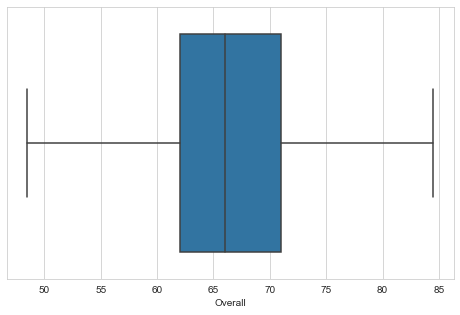

In [17]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x = "Overall", data = fifa20_df)

As we can see here there are no more outliers. Our function is successful

In [18]:
# We have to do this process for the other attributes as well
for column in range(2, fifa20_df.columns.size):
    outlier_suppression(fifa20_df.columns[column])

In [19]:
# As we discussed before the previous visualization part, we have to deal with a categorical variable
# So let's have a look that how many values for each value our variable has
print("-----------------Best Position-----------------")
print(fifa20_df["Best Position"].value_counts())
print("----------------------------------------------")

-----------------Best Position-----------------
CB     3809
ST     2427
GK     2054
CAM    1874
CDM    1458
RW     1143
RM     1130
CM     1070
RB      812
LB      753
LM      652
LW      439
RWB     420
LWB     360
CF      146
Name: Best Position, dtype: int64
----------------------------------------------


We have 15 different values, so it means the dataset's dimension will increase by 15. This is not good news

In [20]:
# One hot encoding process
positionLabel = pd.get_dummies(fifa20_df["Best Position"], prefix="BestPos")
one_hot_fifa20_df = pd.concat([fifa20_df, positionLabel], axis=1)
one_hot_fifa20_df.drop(["Best Position"], axis=1, inplace=True)
one_hot_fifa20_df.head()

,Overall,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,...,BestPos_GK,BestPos_LB,BestPos_LM,BestPos_LW,BestPos_LWB,BestPos_RB,BestPos_RM,BestPos_RW,BestPos_RWB,BestPos_ST
0,84.5,410.5,88,95,70.0,89,88,444.5,95,93,...,0,0,0,0,0,0,0,0,0,0
1,84.5,410.5,84,94,89.0,83,87,415.0,89,81,...,0,0,0,0,0,0,0,0,0,1
2,84.5,410.0,87,87,62.0,87,87,444.5,95,88,...,0,0,0,0,0,0,0,0,0,0
3,84.5,110.5,13,11,16.5,43,13,109.0,23,13,...,1,0,0,0,0,0,0,0,0,0
4,84.5,404.0,93,82,55.0,89,82,436.0,86,85,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Now we can set all of the variables' type as integer.
one_hot_fifa20_df = one_hot_fifa20_df.astype("int64")

In [22]:
# Standardization part
# This process will be done in order to prevent the overfitting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(one_hot_fifa20_df)

# Let's have a look at our data with new appearance
df_scaled = pd.DataFrame(scaled_df,columns=one_hot_fifa20_df.columns)
df_scaled.head()

,Overall,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,...,BestPos_GK,BestPos_LB,BestPos_LM,BestPos_LW,BestPos_LWB,BestPos_RB,BestPos_RM,BestPos_RW,BestPos_RWB,BestPos_ST
0,2.591514,2.363268,2.091123,2.528929,1.045355,2.309710,2.557573,2.402753,2.312023,2.481193,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018
1,2.591514,2.363268,1.872038,2.477751,2.183812,1.837947,2.500967,2.028329,1.949762,1.828377,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,2.577197
2,2.591514,2.363268,2.036352,2.119505,0.566005,2.152456,2.500967,2.402753,2.312023,2.209186,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018
3,2.591514,-2.145696,-2.016725,-1.770025,-2.190257,-1.307146,-1.687845,-1.922496,-2.035117,-1.870914,...,2.833672,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018
4,2.591514,2.273088,2.364979,1.863615,0.146574,2.309710,2.217939,2.299464,1.768631,2.045982,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018


In [23]:
# At this part we split our data as independent and dependent variable
X = df_scaled.drop(["Overall"], axis=1) # Independent(predictor) variable
y = df_scaled[["Overall"]] # Dependent(target) variable
X.head()

,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,...,BestPos_GK,BestPos_LB,BestPos_LM,BestPos_LW,BestPos_LWB,BestPos_RB,BestPos_RM,BestPos_RW,BestPos_RWB,BestPos_ST
0,2.363268,2.091123,2.528929,1.045355,2.309710,2.557573,2.402753,2.312023,2.481193,2.889371,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018
1,2.363268,1.872038,2.477751,2.183812,1.837947,2.500967,2.028329,1.949762,1.828377,1.912327,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,2.577197
2,2.363268,2.036352,2.119505,0.566005,2.152456,2.500967,2.402753,2.312023,2.209186,2.544532,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018
3,-2.145696,-2.016725,-1.770025,-2.190257,-1.307146,-1.687845,-1.922496,-2.035117,-1.870914,-1.651007,...,2.833672,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018
4,2.273088,2.364979,1.863615,0.146574,2.309710,2.217939,2.299464,1.768631,2.045982,2.314639,...,-0.352899,-0.205713,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018


In [24]:
y.head()

,Overall
0,2.591514
1,2.591514
2,2.591514
3,2.591514
4,2.591514


In [25]:
# Dimensionality Reduction Part
# Why we do this? Because our dataset has so many dimensions
# Also his process will prevent overfitting to a certain extent.
# We will use PCA function
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

# This output shows how much variance is explained by each of variable
pca.explained_variance_ratio_

array([4.11230196e-01, 1.22445565e-01, 6.11721226e-02, 4.94461403e-02,
       3.20776126e-02, 2.05420643e-02, 1.97257116e-02, 1.93623274e-02,
       1.91530823e-02, 1.87157956e-02, 1.86438314e-02, 1.84380307e-02,
       1.82901560e-02, 1.82680738e-02, 1.79964033e-02, 1.55763058e-02,
       1.03931559e-02, 9.33016001e-03, 8.63765950e-03, 6.49759740e-03,
       5.94079616e-03, 5.83437955e-03, 5.72431219e-03, 5.64728649e-03,
       5.17405330e-03, 5.13452966e-03, 4.62443819e-03, 4.42490568e-03,
       3.99094016e-03, 3.82007733e-03, 3.68713986e-03, 3.31933631e-03,
       2.89326216e-03, 2.57189487e-03, 2.43352344e-03, 2.30766877e-03,
       2.06354978e-03, 1.94870274e-03, 1.81299948e-03, 1.79674116e-03,
       1.45074003e-03, 1.44084768e-03, 1.26426597e-03, 1.18471212e-03,
       1.17276598e-03, 1.07593500e-03, 6.86130644e-04, 3.93237815e-04,
       1.04855956e-04, 7.19438252e-05, 2.26042568e-05, 2.15992455e-05,
       9.45855604e-06, 8.37448212e-06, 8.11008562e-32, 3.93213952e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

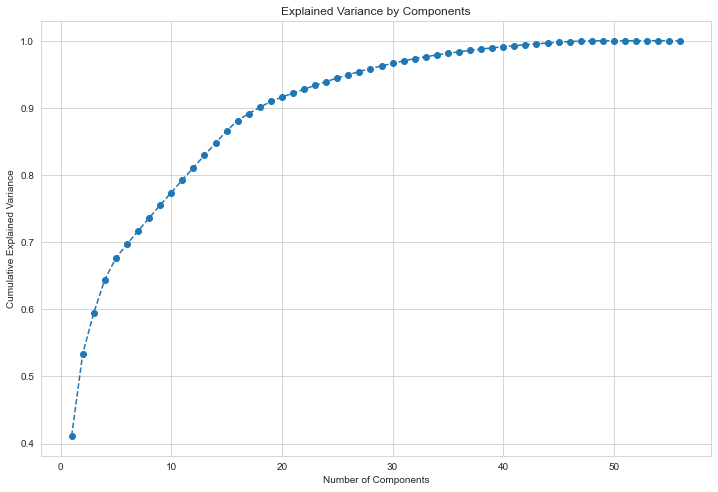

In [26]:
# So let's plot a graph which shows how much vairance is explained with cumulative sum
plt.figure(figsize=(12,8))
plt.plot(range(1,57), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

* As we can see, after at some point the curve is continuing more smoother. 
* This means for every component after this point, explained ratio will not be increased much
* This point is index 15(16 components)

In [27]:
pca.explained_variance_ratio_.cumsum()[15]

0.8810834184038258

* If we choose 16 components, our explained variance will be %88
* Other 40 components will explain only %12 which is pretty low ratio
* We can ignore the loosing of a little information for the sake of the model preformance

In [28]:
# Our optimum pca model
pca = PCA(n_components=16)
pca.fit(X)
pca_scores = pca.transform(X)

In [29]:
# Transformation of our scores to a dataframe
pca_scores_df = pd.DataFrame(pca_scores)
pca_scores_df.columns = ["Component_1", "Component_2", "Component_3", "Component_4", 
                         "Component_5", "Component_6", "Component_7", "Component_8", 
                         "Component_9", "Component_10", "Component_11", "Component_12", 
                         "Component_13", "Component_14", "Component_15", "Component_16"]
pca_scores_df.head()

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16
0,-9.733802,-5.122146,2.983203,-1.739008,0.143027,-2.364214,1.405347,0.537642,1.072481,-0.150522,-0.143069,-0.291952,0.148097,-0.178949,-0.598215,0.610230
1,-9.079379,-4.572213,4.260988,2.176276,-3.068482,-0.466549,0.596939,-0.111116,0.389605,0.027745,-0.031875,-0.024854,0.009147,-0.159912,-0.610803,0.573371
2,-8.779085,-5.704853,2.426634,-2.212442,0.180570,-2.264444,1.522619,0.539146,1.029119,-0.153177,-0.133847,-0.263190,0.176425,-0.183786,-0.546954,0.306617
3,8.852230,-1.348140,3.716404,-1.815270,-3.219332,-1.338871,-0.268851,0.073200,0.221233,-0.137610,-0.084027,0.025087,0.273731,-0.260555,-0.432660,1.346039
4,-9.558534,-2.032436,4.311136,-2.070065,0.716076,-1.788640,1.430036,0.402284,1.022517,-0.056314,-0.130308,-0.330460,0.014793,-0.056022,-0.578716,-0.345509


### Clustering part

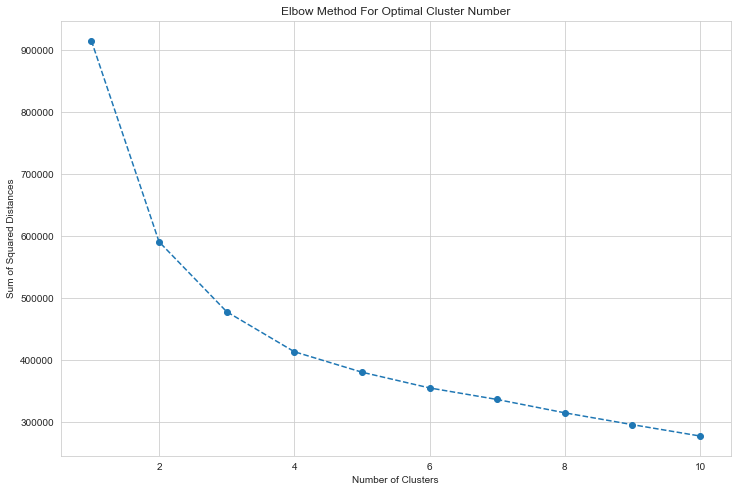

In [30]:
from sklearn.cluster import KMeans
# KMeans modeling for up to 20 clusters 
sum_of_squared_distances = []
number_of_clusters = range(1,11)

# Build kmeans models and storing the sum of squared distances
for k in number_of_clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_scores_df)
    sum_of_squared_distances.append(km.inertia_)

# Elbow method to determine the optimal cluster number
plt.figure(figsize=(12,8))
plt.plot(number_of_clusters, sum_of_squared_distances, marker = "o", linestyle = "--")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Cluster Number')
plt.show()

* Our elbow method says that after some point, our curve is continouing more smoother
* This point is when the number of clusters equals 2
* But we have to prove our observation with silhouette score

In [31]:
# Silhouette scores for each cluster number
from sklearn.metrics import silhouette_score

for n in range(2,11):
    kmeans = KMeans (n_clusters=n)
    predictions = kmeans.fit_predict(pca_scores_df.sample(n=3000, random_state=1))
    s_score = silhouette_score(pca_scores_df.sample(n=3000, random_state=1), predictions)
    print ("For {} clusters, silhouette score = {:5f}".format(n, s_score))

For 2 clusters, silhouette score = 0.477515
For 3 clusters, silhouette score = 0.254506
For 4 clusters, silhouette score = 0.260968
For 5 clusters, silhouette score = 0.243646
For 6 clusters, silhouette score = 0.273398
For 7 clusters, silhouette score = 0.289707
For 8 clusters, silhouette score = 0.307178
For 9 clusters, silhouette score = 0.313583
For 10 clusters, silhouette score = 0.338787


* When the silhouette score closer to 1, it means our clustering process is more successful
* So with this info, the closest value of 1 is 0.477515 when the number of clusters is 2
* This proves our previous observation

In [32]:
# So we create our final kmeans cluster with 2 clusters
final_kmeans = KMeans(n_clusters=2)
final_kmeans.fit(pca_scores_df)

# Append cluster labels and segment names to the scaled data
df_scaled["KMeans Labels"] = final_kmeans.labels_
df_scaled["Clusters"] = df_scaled["KMeans Labels"].map({0:"Cluster1", 1:"Cluster2"})
df_scaled.head()

,Overall,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,...,BestPos_LM,BestPos_LW,BestPos_LWB,BestPos_RB,BestPos_RM,BestPos_RW,BestPos_RWB,BestPos_ST,KMeans Labels,Clusters
0,2.591514,2.363268,2.091123,2.528929,1.045355,2.309710,2.557573,2.402753,2.312023,2.481193,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,0,Cluster1
1,2.591514,2.363268,1.872038,2.477751,2.183812,1.837947,2.500967,2.028329,1.949762,1.828377,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,2.577197,0,Cluster1
2,2.591514,2.363268,2.036352,2.119505,0.566005,2.152456,2.500967,2.402753,2.312023,2.209186,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,0,Cluster1
3,2.591514,-2.145696,-2.016725,-1.770025,-2.190257,-1.307146,-1.687845,-1.922496,-2.035117,-1.870914,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,1,Cluster2
4,2.591514,2.273088,2.364979,1.863615,0.146574,2.309710,2.217939,2.299464,1.768631,2.045982,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,0,Cluster1


* Our final clustering model is looking like that
* It seems these players are seperated as goalkeeper or not goalkeeper(player)
* When we remember the first 5 player of first dataset, 4th player was a goalkeeper

In [33]:
# Rename the cluster labels
df_scaled["Clusters"] = df_scaled["KMeans Labels"].map({0:"Player", 1:"Goalkeeper"})
df_scaled.head()

,Overall,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,...,BestPos_LM,BestPos_LW,BestPos_LWB,BestPos_RB,BestPos_RM,BestPos_RW,BestPos_RWB,BestPos_ST,KMeans Labels,Clusters
0,2.591514,2.363268,2.091123,2.528929,1.045355,2.309710,2.557573,2.402753,2.312023,2.481193,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,0,Player
1,2.591514,2.363268,1.872038,2.477751,2.183812,1.837947,2.500967,2.028329,1.949762,1.828377,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,2.577197,0,Player
2,2.591514,2.363268,2.036352,2.119505,0.566005,2.152456,2.500967,2.402753,2.312023,2.209186,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,0,Player
3,2.591514,-2.145696,-2.016725,-1.770025,-2.190257,-1.307146,-1.687845,-1.922496,-2.035117,-1.870914,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,1,Goalkeeper
4,2.591514,2.273088,2.364979,1.863615,0.146574,2.309710,2.217939,2.299464,1.768631,2.045982,...,-0.190879,-0.155703,-0.140692,-0.213975,-0.254714,-0.25627,-0.152216,-0.388018,0,Player


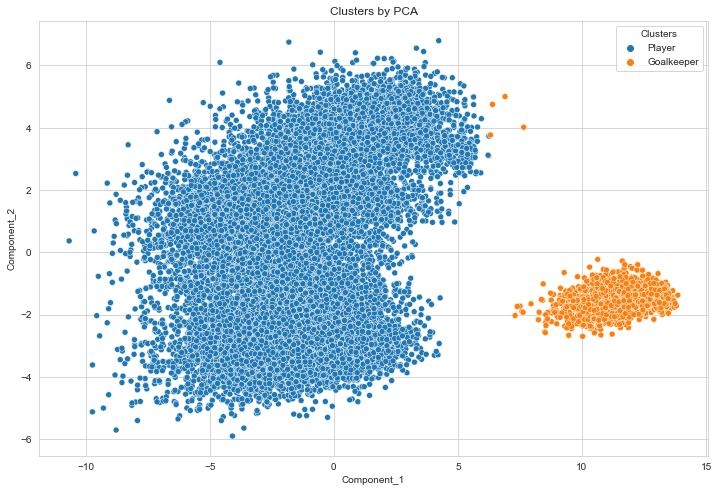

In [34]:
# In order to visualize, we have chose random 2 components and plot the graph
x_axis = pca_scores_df["Component_1"]
y_axis = pca_scores_df["Component_2"]
plt.figure(figsize=(12,8))
sns.scatterplot(x_axis, y_axis, hue=df_scaled["Clusters"])
plt.title("Clusters by PCA")
plt.show()

* Component 1 and component 2 are almost perfectly seperated 
* 4 orange points are considered as player 
* This seems not true

* Remember we have used K-Means which optimizes for distance, not blobbiness
* So for the better result we need to use agglomerative clustering

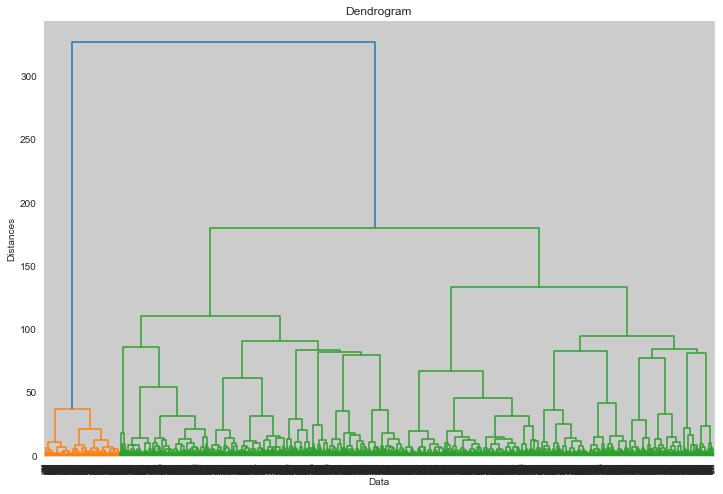

In [35]:
# Agglomerative clustering part
# We need to determine number of cluster by looking at dendogram
# Plotting dendogram takes time (around 5 minutes)
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(pca_scores_df.sample(n=3000, random_state=1), method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Distances')
plt.show()

How we can determine number of clusters?
- We need to look at the longest lines.
- So the blue lines is matching.
- It means that this model will has 2 clusters.

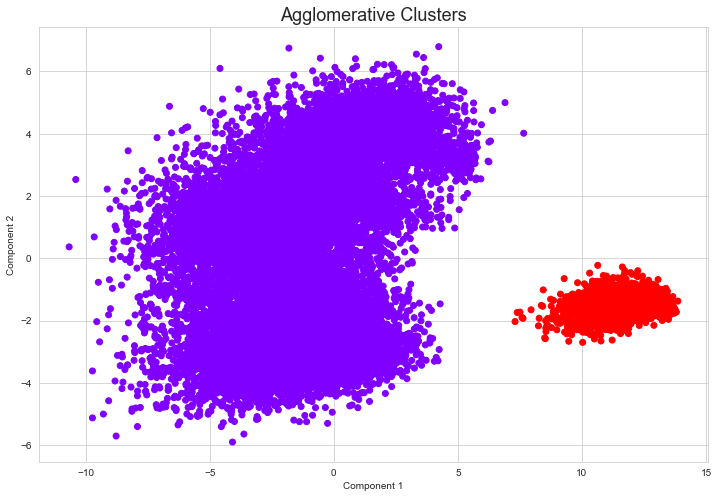

In [36]:
# Finally we can build our model
from sklearn.cluster import AgglomerativeClustering
agl_cluster = AgglomerativeClustering(n_clusters = 2)

# In order to visualize, we have chose random 2 components and plot the graph
plt.figure(figsize =(12, 8))
plt.scatter(pca_scores_df['Component_1'], pca_scores_df['Component_2'], c = agl_cluster.fit_predict(pca_scores_df), cmap ='rainbow')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Agglomerative Clusters", fontsize=18)
plt.show()

* It seems our previous result is improved
* Previous 4 points are in correct cluster
* Nonetheless we can look at silhouette scores for each clustering model

In [37]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# This function takes one string parameter
# If kmeans, then plots the kmeans' silhouette plot, agglomerative's silhouette plot otherwise. 
def silhouette_plot(cluster_type):
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(12, 8)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_scores_df) + (2 + 1) * 10])

    if cluster_type == "kmeans":
        clusterer = KMeans(n_clusters=2)
    else:
        clusterer = AgglomerativeClustering(n_clusters=2)
    cluster_labels = clusterer.fit_predict(pca_scores_df)

    silhouette_avg = silhouette_score(pca_scores_df, cluster_labels)
    print("For n_clusters =",2,"The average silhouette_score is :",silhouette_avg,)
    sample_silhouette_values = silhouette_samples(pca_scores_df, cluster_labels)

    y_lower = 10
    for i in range(2):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / 2)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for {}".format(cluster_type))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


For n_clusters = 2 The average silhouette_score is : 0.47703927670618584


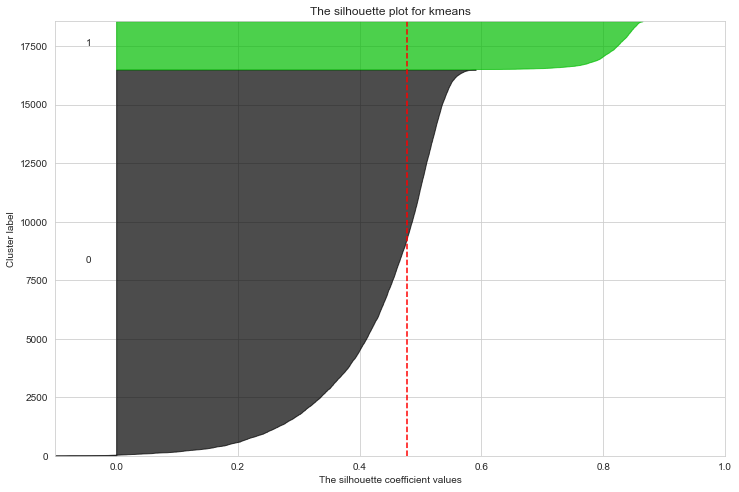

In [38]:
# Silhouette plot for kmeans
silhouette_plot("kmeans")

For n_clusters = 2 The average silhouette_score is : 0.4773611596218045


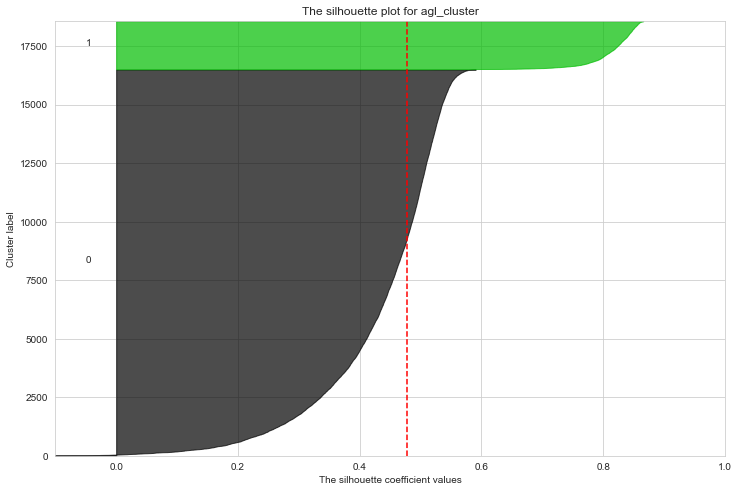

In [39]:
# Silhouette plot for agglomerative clustering
silhouette_plot("agl_cluster")

* Silhouette score of K-Means = 0.477039
* Silhouette score of Agglomerative Clustering = 0.477361
* Agglomerative clustering has closer score to 1
* It means our observation is true
* Agglomerative clustering showed better performance than K-Means

# Step 4: Predictive Modelling

In [40]:
# Importing Train test split.
from sklearn.model_selection import train_test_split

In [41]:
# Train test split process 2 times in a row.
# First split in order to obtain train and test sets as the test size is 0.2
# Second split in order to obtain train and validation sets as the validation(test) size is 0.25
X_train, X_test, y_train, y_test = train_test_split(pca_scores_df, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print("Shape of X_train is: {}         Shape of y_train is: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is: {}           Shape of y_test is: {}".format(X_test.shape, y_test.shape))
print("Shape of X_val is:{}             Shape of y_val is: {}".format(X_val.shape, y_val.shape))

Shape of X_train is: (11127, 16)         Shape of y_train is: (11127, 1)
Shape of X_test is: (3710, 16)           Shape of y_test is: (3710, 1)
Shape of X_val is:(3710, 16)             Shape of y_val is: (3710, 1)


* Train set size = %60
* Test set size = %20
* Validation set size = %20

In [42]:
# Build our first model without any hyperparameter
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
first_knn_model = KNeighborsRegressor()
first_knn_model.fit(X_train, y_train)
print("Mean squared error of first kNN model is: {}".format(mean_squared_error(y_test, first_knn_model.predict(X_test))))

Mean squared error of first kNN model is: 0.10939851990879555


Our goal is reduce this mean square error

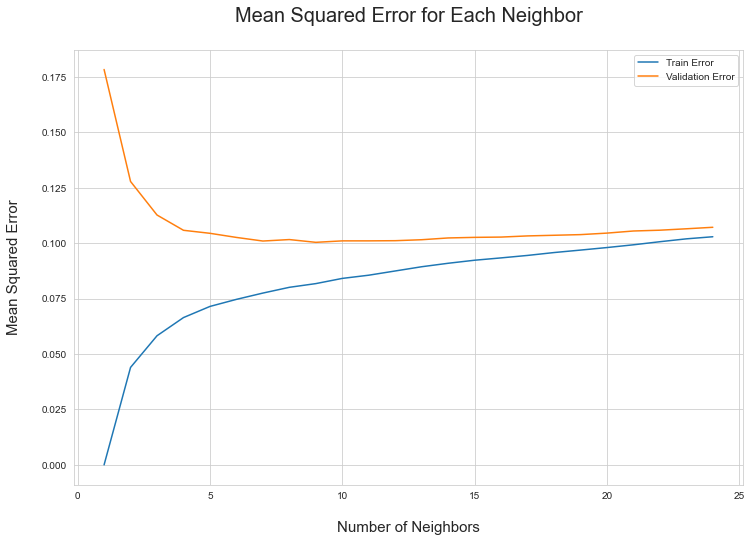

In [43]:
# We defined 2 empty lists and a list that contains numbers from 1 to 20
# These empty lists will store train and validation errors
# neighbors list will be used in the for loop below in order to find optimal neighbor number for our kNN model
train_errors = []
valid_errors = []
neighbors = list(range(1,20))
for n in neighbors:
    knn_model = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, knn_model.predict(X_train)))
    valid_errors.append(mean_squared_error(y_val, knn_model.predict(X_val)))
    
# Plot the results
plt.figure(figsize=(12,8))
plt.title("Mean Squared Error for Each Neighbor\n", fontsize=20)
plt.xlabel("\nNumber of Neighbors", fontsize=15)
plt.ylabel("Mean Squared Error\n", fontsize=15)
plt.plot(neighbors, train_errors, label="Train Error")
plt.plot(neighbors, valid_errors, label="Validation Error")
plt.legend()
plt.show()

* We need to select a neighbor number such that our validation error is mininum as much as possible while our train error is not too much
* This value is 9

In [44]:
# Our final model with selected optimum hyperparameter
final_knn_model = KNeighborsRegressor(n_neighbors=9)
final_knn_model.fit(X_train, y_train)
print("Mean squared error of final kNN model is: {}".format(mean_squared_error(y_test, final_knn_model.predict(X_test))))

Mean squared error of final kNN model is: 0.10605211566379427


* Before this optimum hyperparameter selection process, our error was about 0.10940
* After the process, our error reduced and it becomes 0.10605
* It shows that this process is successful
* Our kNN model has better performance than the previous

In [45]:
# Let's try another regression model in order to compare with the kNN
from sklearn.tree import DecisionTreeRegressor
first_dec_tree_model = DecisionTreeRegressor(random_state=1)
first_dec_tree_model.fit(X_train, y_train)
print("Mean squared error of first decision tree model is: {}".format(mean_squared_error(y_test, first_dec_tree_model.predict(X_test))))

Mean squared error of first decision tree model is: 0.19314532132524487


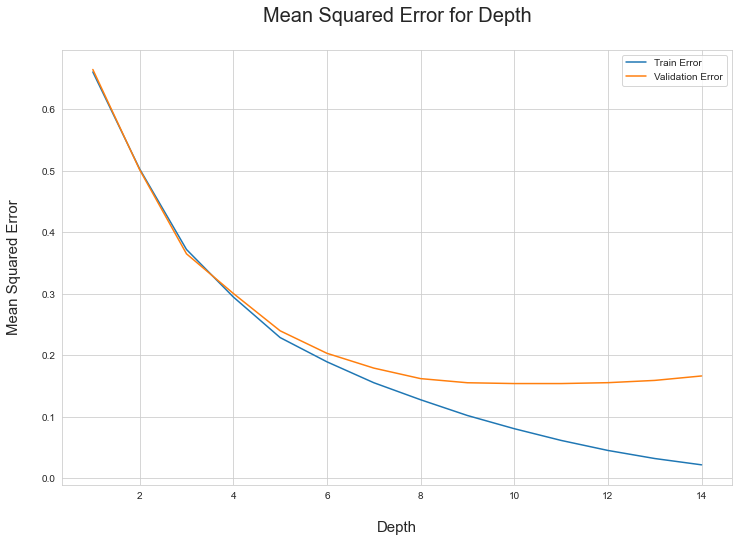

In [46]:
# We defined 2 empty lists and a list that contains numbers from 1 to 20
# These empty lists will store train and validation errors
# max_depth list will be used in the for loop below in order to find optimal depth for our decision tree model
train_errors = []
valid_errors = []
max_depth = list(range(1,15))
for depth in max_depth:
    dec_tree_model = DecisionTreeRegressor(max_depth=depth, random_state=1).fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, dec_tree_model.predict(X_train)))
    valid_errors.append(mean_squared_error(y_val, dec_tree_model.predict(X_val)))
    
# Plot the results
plt.figure(figsize=(12,8))
plt.title("Mean Squared Error for Depth\n", fontsize=20)
plt.xlabel("\nDepth", fontsize=15)
plt.ylabel("Mean Squared Error\n", fontsize=15)
plt.plot(max_depth, train_errors, label="Train Error")
plt.plot(max_depth, valid_errors, label="Validation Error")
plt.legend()
plt.show()

* Our validation error is minimum when the depth of the tree is 11
* Let's put this value to our final model

In [47]:
# Our final model is built
from sklearn.tree import DecisionTreeRegressor
final_dec_tree_model = DecisionTreeRegressor(max_depth=11, random_state=1)
final_dec_tree_model.fit(X_train, y_train)
print("Mean squared error of final decision tree model is: {}".format(mean_squared_error(y_test, final_dec_tree_model.predict(X_test))))

Mean squared error of final decision tree model is: 0.15543078147827555


* Before this optimum hyperparameter selection process, our error was about 0.19315
* After the process, our error reduced and it becomes 0.15543
* It shows that this process is successful
* Our decision tree model has better performance than the previous

# Step 5: Model Evaluation and Visualizations

### When we look at the final error for both models, kNN model has lower mean squared error value
### So that's why, kNN model is more accurate than the decision tree model

## Since I worked with regression models, I could not visualize the model results with more details. Like confusion matrix and precision-recall curve is used with classification models. So I evaluate the mean squared error values only. 